In [1]:
import os
import random
import numpy as np
from numpy import mean
from numpy import std
import pandas as pd
from pandas import datetime
from pandas import DataFrame
import matplotlib.pyplot as plt
from pandas import Series



from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

C:\ProgramData\Anaconda3\envs\Forecatsing\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  import sys


In [2]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.") 

In [3]:
case1 = pd.read_csv('data/jakarta/case_maret_january.csv')
case2 = pd.read_csv('UK/case.csv')
mobility1 = pd.read_csv('data/jakarta/mobility_maret_january.csv')
mobility2 = pd.read_csv('UK/mobility.csv')
shampoo = pd.read_csv('shampoo.csv')

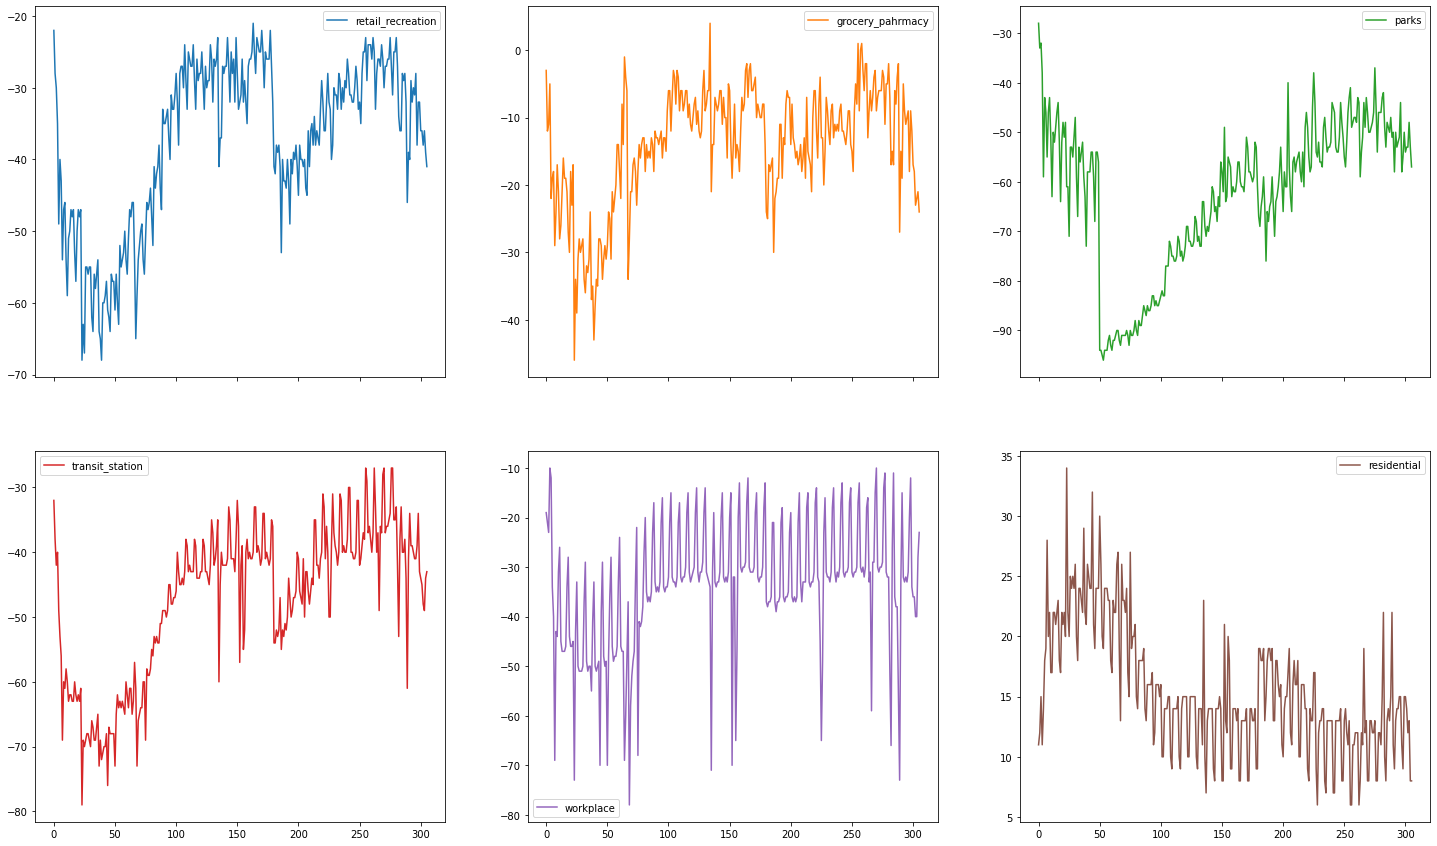

In [4]:
mobility1.plot(subplots=True, layout=(2,3), figsize=(25,15))
plt.show()

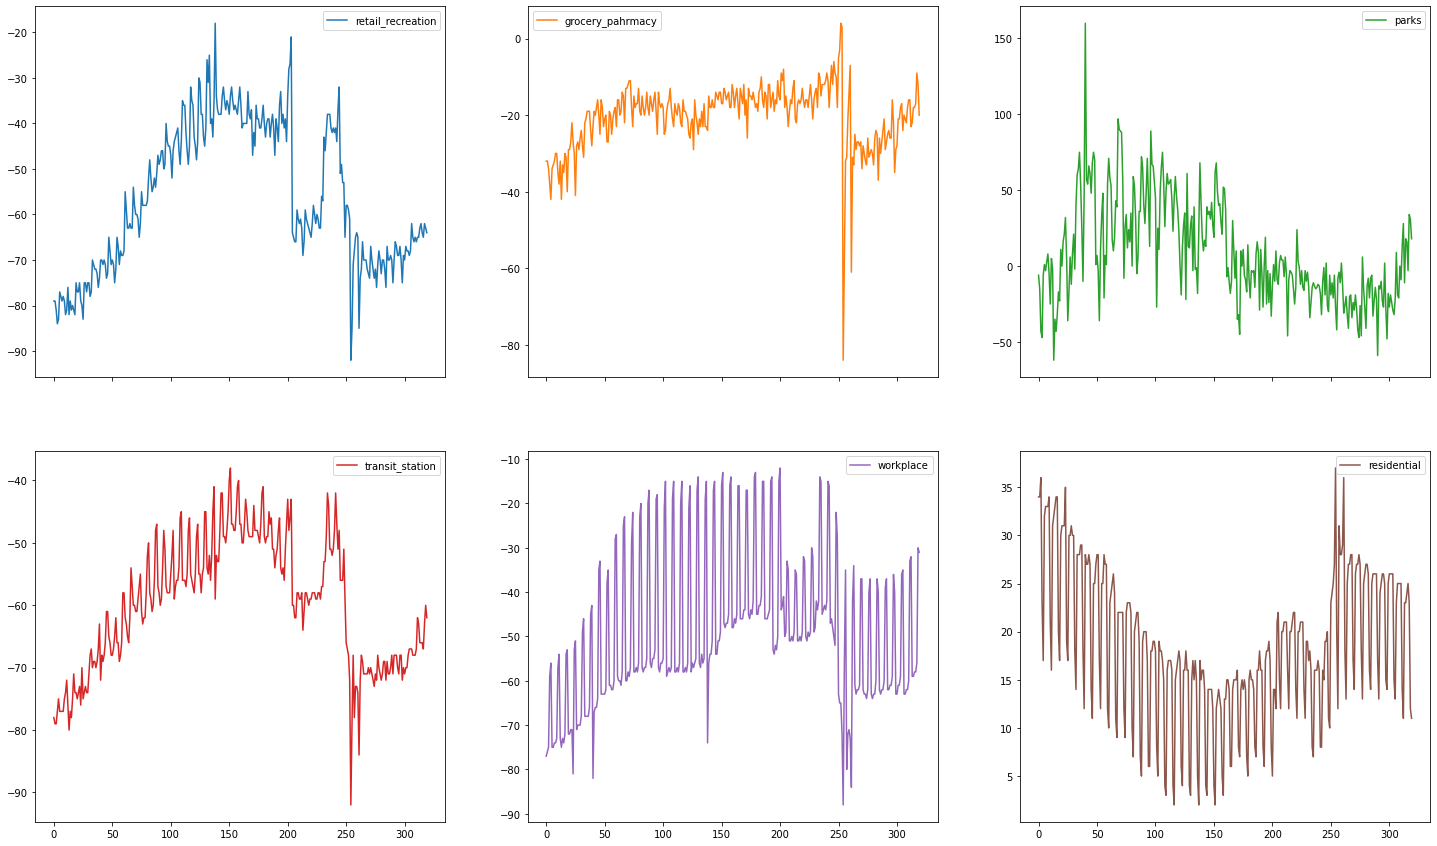

In [5]:
mobility2.plot(subplots=True, layout=(2,3), figsize=(25,15))
plt.show()

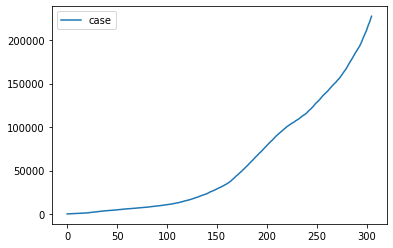

In [6]:
case1.plot()
plt.show()

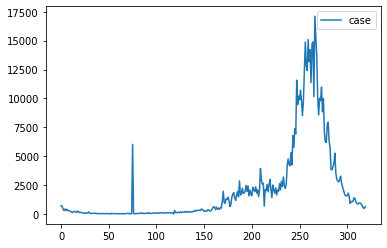

In [7]:
case2.plot()
plt.show()

In [8]:
case1.set_index('date', inplace=True)
case2.set_index('date', inplace=True)
mobility1.set_index('date', inplace=True)
mobility2.set_index('date', inplace=True)

In [9]:
# ADF test untuk case jakarta
for name, column in case1.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "case" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 1.3079
 No. Lags Chosen       = 9
 Critical value 1%     = -3.453
 Critical value 5%     = -2.871
 Critical value 10%    = -2.572
 => P-Value = 0.9967. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.




In [10]:
# ADF test untuk case london
for name, column in case2.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "case" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.9245
 No. Lags Chosen       = 15
 Critical value 1%     = -3.452
 Critical value 5%     = -2.871
 Critical value 10%    = -2.572
 => P-Value = 0.0426. Rejecting Null Hypothesis.
 => Series is Stationary.




In [11]:
# ADF test untuk mobility jakarta
for name, column in mobility1.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "retail_recreation" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.6423
 No. Lags Chosen       = 14
 Critical value 1%     = -3.453
 Critical value 5%     = -2.872
 Critical value 10%    = -2.572
 => P-Value = 0.4611. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "grocery_pahrmacy" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.4067
 No. Lags Chosen       = 8
 Critical value 1%     = -3.453
 Critical value 5%     = -2.871
 Critical value 10%    = -2.572
 => P-Value = 0.1399. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "parks" 
    -----------------------------------------------
 Null H

In [12]:
# ADF test untuk mobility london
for name, column in mobility2.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "retail_recreation" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.0783
 No. Lags Chosen       = 9
 Critical value 1%     = -3.452
 Critical value 5%     = -2.871
 Critical value 10%    = -2.572
 => P-Value = 0.2533. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "grocery_pahrmacy" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.0143
 No. Lags Chosen       = 7
 Critical value 1%     = -3.451
 Critical value 5%     = -2.871
 Critical value 10%    = -2.572
 => P-Value = 0.0336. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "parks" 
    -----------------------------------------------
 Null Hypothesis: Data has uni

# Data yang Stationary :
# - Case London (case2)
# - Grocery_pahrmacy London (mobility2)

In [13]:
mobility_diff1 = mobility1.diff()
mobility_diff1 = mobility_diff1.iloc[1:]
print(mobility_diff1)

            retail_recreation  grocery_pahrmacy  parks  transit_station  \
date                                                                      
2020-03-19               -6.0              -9.0   -5.0             -6.0   
2020-03-20               -2.0               1.0    1.0             -4.0   
2020-03-21               -5.0               6.0   -6.0              2.0   
2020-03-22              -14.0             -17.0  -21.0             -9.0   
2020-03-23                9.0               3.0   16.0             -4.0   
...                       ...               ...    ...              ...   
2021-01-13                0.0              -1.0    1.0             -1.0   
2021-01-14               -2.0              -5.0    0.0             -3.0   
2021-01-15                2.0               1.0    5.0             -1.0   
2021-01-16               -3.0               1.0   -5.0              5.0   
2021-01-17               -2.0              -3.0   -4.0              1.0   

            workplace  r

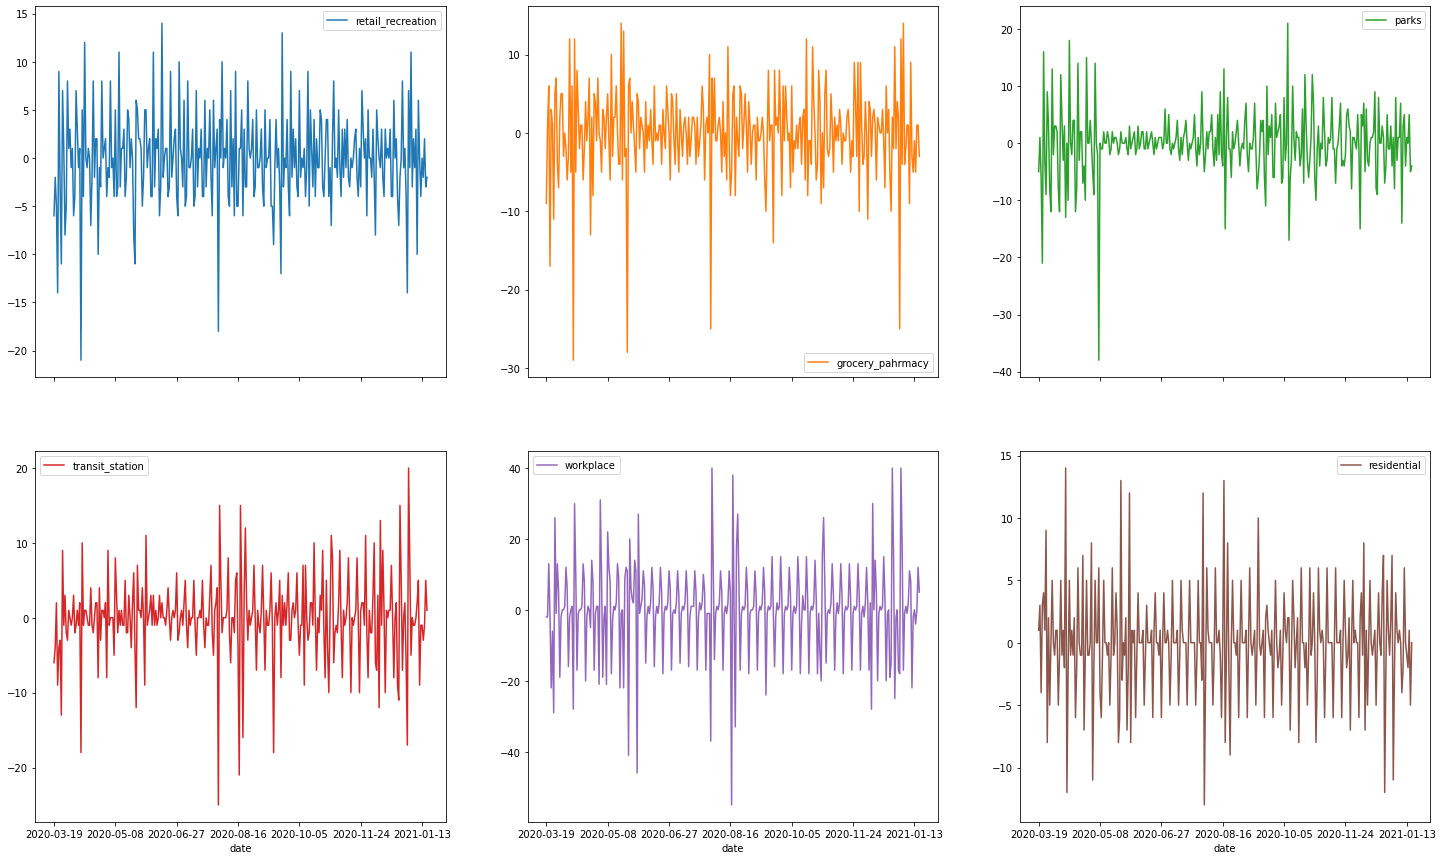

In [14]:
mobility_diff1.plot(subplots=True, layout=(2,3), figsize=(25,15))
plt.show()

In [15]:
# ADF test untuk setiap column
for name, column in mobility_diff1.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "retail_recreation" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.7181
 No. Lags Chosen       = 13
 Critical value 1%     = -3.453
 Critical value 5%     = -2.872
 Critical value 10%    = -2.572
 => P-Value = 0.0001. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "grocery_pahrmacy" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -6.7098
 No. Lags Chosen       = 8
 Critical value 1%     = -3.453
 Critical value 5%     = -2.871
 Critical value 10%    = -2.572
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "parks" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.


In [16]:
mobility_diff2 = mobility2.diff(periods=1)
mobility_diff2 = mobility_diff2.iloc[1:]
print(mobility_diff2)

            retail_recreation  grocery_pahrmacy  parks  transit_station  \
date                                                                      
2020-04-16                0.0               0.0   -9.0             -1.0   
2020-04-17               -2.0              -2.0  -28.0              0.0   
2020-04-18               -3.0              -4.0   -4.0              2.0   
2020-04-19                1.0              -4.0   41.0              2.0   
2020-04-20                6.0               8.0    7.0             -2.0   
...                       ...               ...    ...              ...   
2021-02-24               -2.0               0.0   -2.0              0.0   
2021-02-25               -1.0               1.0  -19.0             -1.0   
2021-02-26                3.0               8.0   37.0              4.0   
2021-02-27               -1.0              -3.0   -3.0              3.0   
2021-02-28               -1.0              -8.0  -13.0             -2.0   

            workplace  r

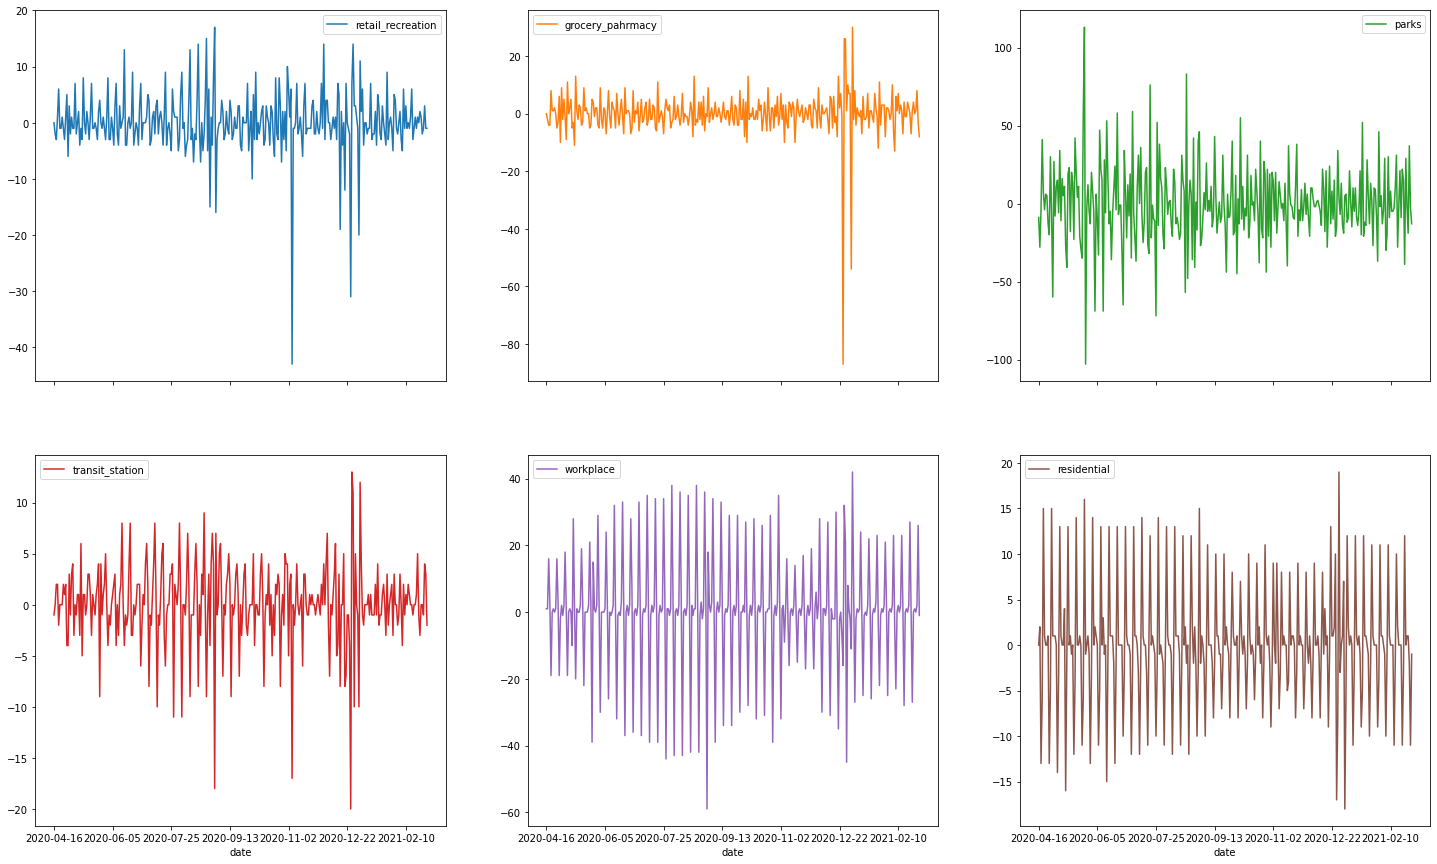

In [17]:
#mobility_diff2.plot()
mobility_diff2.plot(subplots=True, layout=(2,3), figsize=(25,15))
plt.show()

In [18]:
# ADF test untuk setiap column
for name, column in mobility_diff1.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "retail_recreation" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.7181
 No. Lags Chosen       = 13
 Critical value 1%     = -3.453
 Critical value 5%     = -2.872
 Critical value 10%    = -2.572
 => P-Value = 0.0001. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "grocery_pahrmacy" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -6.7098
 No. Lags Chosen       = 8
 Critical value 1%     = -3.453
 Critical value 5%     = -2.871
 Critical value 10%    = -2.572
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "parks" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.


# Summary :
# - Mobility1 differencing order 1 --> Stationary all
# - Mobility2 differencing order 2 -- > Stationary all